## Etape 2 : Statistiques descriptives

Import des différentes librairies utiles à l'analyse :

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from datetime import datetime
import time
import seaborn as sns

Il est nécessaire d'installer et d'importer "importnb" pour avoir accès aux fonctionns définies dans "algoStatCourse" :

In [2]:
#pip install importnb

Note: you may need to restart the kernel to use updated packages.


In [3]:
from importnb import Notebook
with Notebook():
    import algoStatCourse

Il faut ensuite importer un jeu de donnée. On prend le jeu de données correspondant aux 10 kilomètres de Riorges comme exemple pour l'analyse:

In [4]:
data=pd.read_csv("10_km_Riorges.csv")

Comme chaque jeu de données extrait, nous avons à notre disponibilité le nom et prénom de chaque athlète, leur performance, leur années de naissance, la catégorie à laquelle ils appartiennent, leur temps, ainsi que leur écart de temps avec le premier.

In [46]:
data.head()

,Athlète,Ligue,Performance,Naissance,Catégorie,time_delta,time_gap,duration,Nom,Prénom,h_duration
0,LORTON Guillaume,ARA,N4,1989,SEM,0 days 00:30:58,0 days 00:00:00,1858.0,LORTON,Guillaume,00:30:58
1,BETRON Adrien,ARA,IR1,1989,SEM,0 days 00:31:30,0 days 00:00:32,1890.0,BETRON,Adrien,00:31:30
2,MOULIN Loic,ARA,IR2,1992,SEM,0 days 00:32:01,0 days 00:01:03,1921.0,MOULIN,Loic,00:32:01
3,DEBROUCKER Guillaume,ARA,IR2,1982,M1M,0 days 00:32:15,0 days 00:01:17,1935.0,DEBROUCKER,Guillaume,00:32:15
4,KEMEI Charles,ARA,IR2,1984,M0M,0 days 00:32:40,0 days 00:01:42,1960.0,KEMEI,Charles,00:32:40


On ajoute la variable 'h_duration' qui permet d'obtenir le temps d'arrivée dans le format heures, minutes, secondes, afin d'avoir une variable explicite pour la visualisation.

In [11]:
data['h_duration'] = data['duration'].apply(lambda x : pd.to_datetime(x,unit="s").strftime('%H:%M:%S'))

Nous analysons maintenant les statistiques descriptives du temps d'arrivée afin de connaitre rapidement la forme des données, et la présence de possible valeurs abérantes, pour guider la construction des visualisations utile à l'athlète. Dans ce jeu de données, nous n'avons à première vue pas de potentiels valeurs abbérantes étant données que les temps sont environ réparti entre 30 et 70 mn, temps normaux pour une course de 10 km.

In [7]:
(data['duration']/60).describe()

count    250.000000
mean      46.830600
std        8.432333
min       30.966667
25%       39.666667
50%       46.158333
75%       52.758333
max       70.750000
Name: duration, dtype: float64

In [ ]:
def Prenom():
  user_input = input("Veuillez entrer votre prénom")
  return user_input

def Nom():
  user_input = input("Veuillez entrer votre nom")
  return user_input

Ici, on définit une fonction permettant de donner directement les premières informations utile, à partir du nom et prénom, de la performance individuelle relativement à la performance globale de la compétition.

In [124]:
def info_participant():
    x=Prenom()
    y=Nom()
    if ~data['Athlète'].isin([(y.upper()+" "+x.capitalize())]).any():
        print("Le nom que vous avez entré n'est pas dans la liste des participants de la course choisie.")
    else:
        print('non')
        z=data.index[data.Athlète==(y.upper()+" "+x.capitalize())]
        print("Temps d'arrivé :", data.loc[z[0],'h_duration'])
        print("Position d'arrivée : ", data.index[z[0]]+1)
        print("Niveau de la performance", data.loc[z[0],'Performance'])
        print("Temps d'arrivé dans le top :", math.ceil(((data.duration<=data.loc[z[0],'duration']).sum())/len(data)*100),"%")
        print("Position parmis les", len(data[data['Catégorie']==data.loc[z[0],'Catégorie']]),"participants de la catégorie", data.loc[z[0],'Catégorie'], ":",round(data[data['Catégorie']==data.loc[z[0],'Catégorie']]['duration'].rank().loc[z[0]]))
        print("Position parmis les", len((data[abs(data.loc[:,'Naissance']-data.loc[z[0],'Naissance'])<=5])), "participants ayant plus ou moins 5 ans de différence d'âge avec vous : ", round(((data[abs(data.loc[:,'Naissance']-data.loc[z[0],'Naissance'])<=5])['duration'].rank()).loc[z[0]]))

Exemple d'utilisation de cette fonction :

In [126]:
info_participant()

Veuillez entrer votre prénom Charle
Veuillez entrer votre nom kemei


Le nom que vous avez entré n'est pas dans la liste des participants de la course choisie


In [12]:
#sns.kdeplot(data['duration'], shade=True,  alpha=.3) #remplacé par la fonction lissage, + propre
densite=algoStatCourse.dens(data['duration'], bins = 12) #calcule un array numpy 2*2 avec la fonction de densité estimée (absices en ligne 0, ordonnées en ligne 2)
fcubic=algoStatCourse.lissage(densite, sep = True) #fonction qui est un joli lissage visuel de la densité (interpolation cubique)
#/!\ ne pas utiliser fcubic hors des bornes de la densité : xmin = densite[0,0], xmax = densite[0,-1] (les x sont sur la premiere ligne)
flin=algoStatCourse.lissage(densite, sep = False, kind = 'linear') #fonction qui retourne la densité estimée
#/!\ ne pas utiliser flin hors des bornes de la densité : xmin = densite[0,0], xmax = densite[0,-1]
# Calcule du quantile 75% quantile

def truncf (f,xmin, xmax):
    #prend en argument la fonction de densité f (interpolée ou non, c'est un choix visuel) et retourne la même fonction mais mise à 0 hors de [xmin, xmax]
    #input : f :fonction (1 dimension)
    #     xmin : borne inf, nombre
    #     xmax : borne sup, nombre
    def f2 (x):
        if (x>=xmin)*(x<=xmax):
            return f(x)
        return np.nan
    
    return np.vectorize(f2)

NameError: name 'algoStatCourse' is not defined

In [13]:
prenom="Alberto"
nom="BASILE"

def graphePerso(nom, prenom):
    z=data.index[data.Athlète==(nom.upper()+" "+prenom.capitalize())]
    quantile75 = np.quantile(data['duration'], ((data.duration<=data.loc[z[0],'duration']).sum())/len(data)) #proportion de meilleur temps
    
    x= np.linspace(densite[0,0], densite[0,-1], int(1e5)) #x pour un tracé continu

    tempsAxe = np.linspace(densite[0,0],densite[0,-1], 6) #les nouvelles abscisses en secondes
    labelTempsAxe = pd.Series(tempsAxe).apply(lambda x : pd.to_datetime(x,unit="s").strftime('%H:%M:%S')) #les nouvelles abscisses en écriture lisible

    plt.figure(figsize=(8,4.5), dpi=80) #format de la figure, (dpi pour la résolution)
    plt.fill_between(x, fcubic(x), alpha = 0.3) #fonction pour colorier l'aire sous la courbe
    plt.plot(x, fcubic(x), color = 'blue', label = 'densité lissée & interpolée')

    #plt.plot(x,flin(x), linestyle ='--', color = 'black', label = "densité réelle") #choisir laquelle dessiner et utiliser fill_between pour avoir l'aire coloriée

    plt.axvline(quantile75, color='r',alpha=0.3)

    f2=truncf(fcubic, densite[0,0], quantile75)
    plt.fill_between(x,f2(x), alpha = 0.6, color = 'red')

    #plt.axvspan(quantile75, densite[0,0], color='r', alpha=0.3)
    plt.legend() #permet d'afficher les legendes qu'on a mises dans les arguments 'label' des fonctions juste au dessus

    # Ajout des labels et titre
    plt.title("Densité des temps d'arrivée", color= 'tab:red', fontsize = '20', fontstyle = 'oblique') # titre
    plt.xlabel("Durée pour franchir la ligne d'arrivée", fontstyle = 'italic', labelpad=5)
    plt.ylabel("Densité des athlètes", fontstyle = 'italic', labelpad=20)
    plt.xticks(tempsAxe,labels = labelTempsAxe) #permet de choisir ce qu'on met sur l'axe des x : les coordonnees dans le premier argument, ce qu'il faut afficher dans l'autre.
    plt.ylim((-0.1*max(densite[1]),1.1*max(densite[1]))) # permet de choisir l'espace au dessus et au dessous du graphe
    plt.text(data.loc[z[0],'duration'],0,data.loc[z[0],'Prénom'] ) # ajoute un texte directement sur le graphe
    plt.show()
graphePerso("BASILE", "Alberto")

NameError: name 'densite' is not defined

In [14]:
data.loc[z[0],'Prénom']

'Alberto'

In [29]:
def tracegraphe

1960.0

In [20]:
df1=data.groupby('Naissance').agg(['count','mean','max','min','std'])

/var/folders/jy/77k463fj5d94h9zj3_qn_glh0000gn/T/ipykernel_8171/3200262511.py:1: FutureWarning: ['Athlète', 'Ligue', 'Performance', 'Catégorie', 'time_delta', 'time_gap', 'Nom', 'Prénom', 'h_duration'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  df1=data.groupby('Naissance').agg(['count','mean','max','min','std'])


Modélisation:

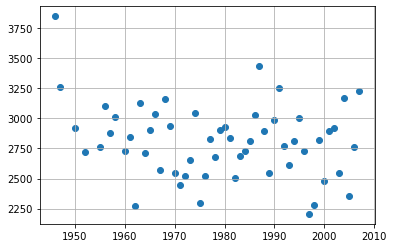

In [19]:
axes = plt.axes()
axes.grid() 
plt.scatter(df1.index,df1.loc[:,df1.columns[1]])
plt.show()

Podium par Catégorie:

In [14]:
#Extraction des différentes catégories de la compétition

Catégorie = data['Catégorie'].unique()

# Création d'un dictionaire des temps pour chaque catégorie

dict_catégorie = {}
for x in Catégorie:
    dict_catégorie[x] = data['duration'][data['Catégorie']==x]
    
#Création d'un dataframe avec les catégorie en colonnes et les temps des participants y appartenant en valeur
    
df_catégorie = pd.DataFrame(dict_catégorie)

#Tri des temps pour les 3 premiers temps de chaque catégorie


df1_catégorie=df_catégorie.copy()
for col in df1_catégorie.columns:
    for i in range(3):
        df1_catégorie[col][i] = df_catégorie[col].nsmallest(3).iloc[i]
        
#Extractio des Athlètes correspondants aux 3 premier temps de chaque catégorie
for col in df1_catégorie.columns:
    for i in range(3):
        try:
            df1_catégorie[col][i]=data[['Athlète']][data['duration']==df1_catégorie[col][i]].iloc[0,0]
        except:
            break

#Extraction des 3 premières ligne correspondant au podium
df1_catégorie=df1_catégorie.iloc[:3,:]
df1_catégorie['Podium']=['Premier','Deuxième','Troisième']
df1_catégorie = df1_catégorie.set_index('Podium')
display(df1_catégorie)

/var/folders/jy/77k463fj5d94h9zj3_qn_glh0000gn/T/ipykernel_2702/3476567333.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1_catégorie[col][i]=data[['Athlète']][data['duration']==df1_catégorie[col][i]].iloc[0,0]
/var/folders/jy/77k463fj5d94h9zj3_qn_glh0000gn/T/ipykernel_2702/3476567333.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1_catégorie[col][i]=data[['Athlète']][data['duration']==df1_catégorie[col][i]].iloc[0,0]
/var/folders/jy/77k463fj5d94h9zj3_qn_glh0000gn/T/ipykernel_2702/3476567333.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveat

,SEM,M1M,M0M,M3M,ESM,JUM,M4M,M2M,M5M,M1F,...,M7M,JUF,M3F,M5F,CAF,M4F,M8M,M0F,M6F,M8F
Podium,,,,,,,,,,,,,,,,,,,,,
Premier,LORTON Guillaume,DEBROUCKER Guillaume,KEMEI Charles,BUISSON Antoine,PETRAS Guillaume,BOYER Theo,MAHAMDI Ahmed,ANGELI Stephane,CARVELLI Salvatore,LECOMTE Claire,...,ARNAL Jean,MERAT Audrey,PITAVY Lydia,CUBIZOLLES Martine,DJIGO Rosane,GOUREAU Lucie,MASTON Walter,QUENOT Marie,JULIEN Annie,REURE Michele
Deuxième,BETRON Adrien,SPIMOLA MARQUES,CROUE Jeremy,DEFOUS Stephane,DOUCET Thomas,TACHET Alexis,CHADEBEC Patrick,PONCHON Freddy,VASSAL Fabrice,BENIGAUD Aurelien,...,LOMBARD Joseph,GORDONS Ines,NaN,VIAL Bruno,BESSON Agathe,PROMONET Nelly,NaN,COUTO Celine,NaN,NaN
Troisième,MOULIN Loic,TACHET Alexis,REBOUL Samuel,GIRAUDIER Francois,PERRAUD Victor,MILLY Corentin,CHAMPALLE Thierry,SPITALIERI Patrick,BELGUERRI Nordine,THEVENON Aurelie,...,RISI Xavier,NaN,NaN,NaN,NaN,NaN,NaN,THOMAS Marie,NaN,NaN
